In [131]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

data= load_iris()
X= data['data']
y= data['target']
print(X.shape, y.shape)
mask = y != 2
X = X[mask]
y = y[mask]

df = pd.DataFrame(data=X, columns=['sepal length', 'sepal width', 'petal length', 'petal width'])
df.head()


(150, 4) (150,)


,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


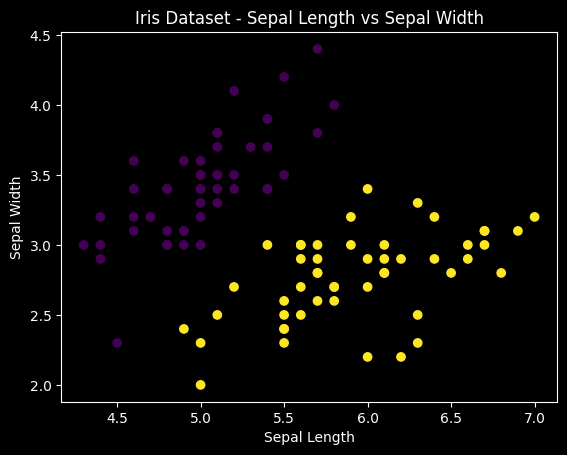

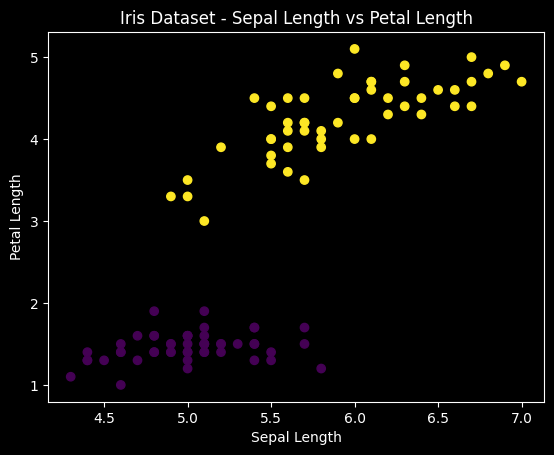

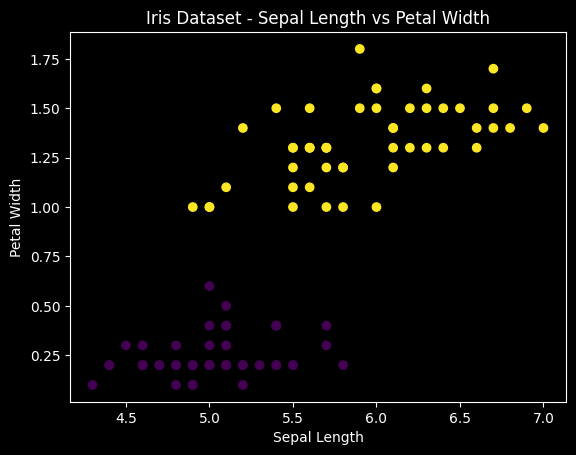

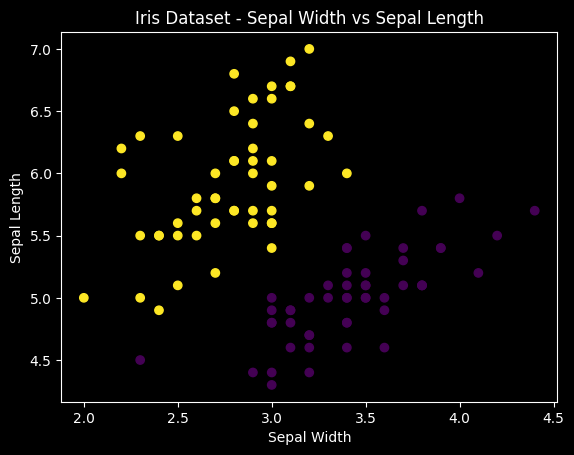

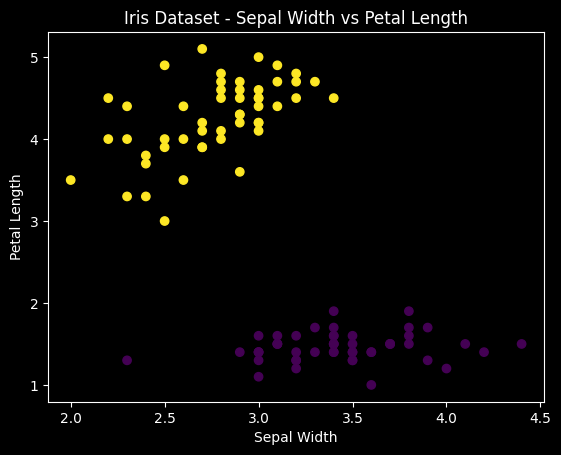

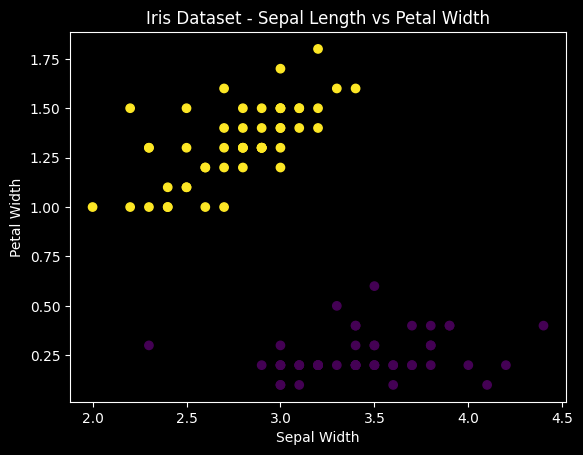

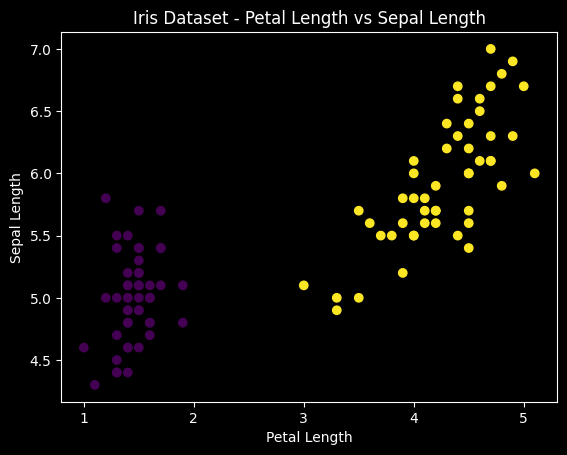

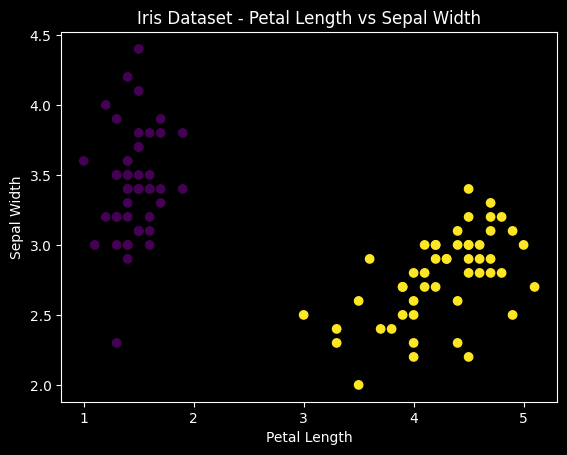

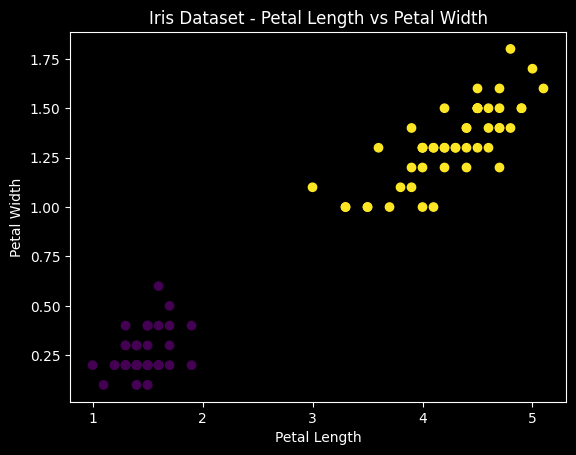

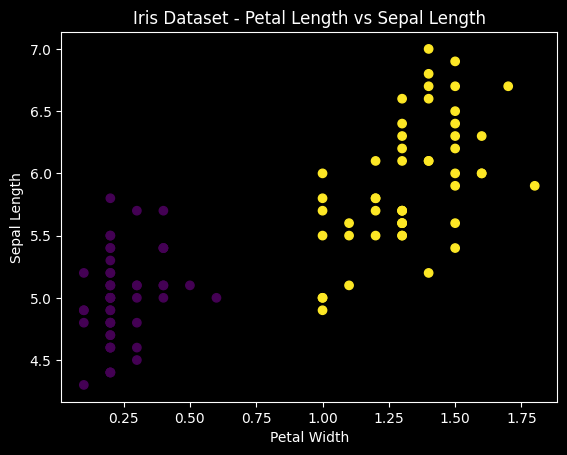

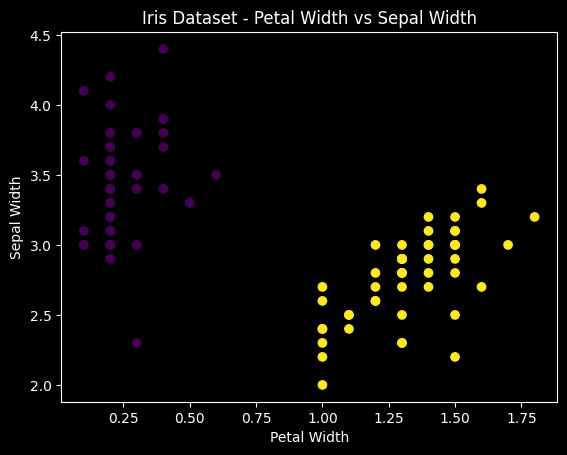

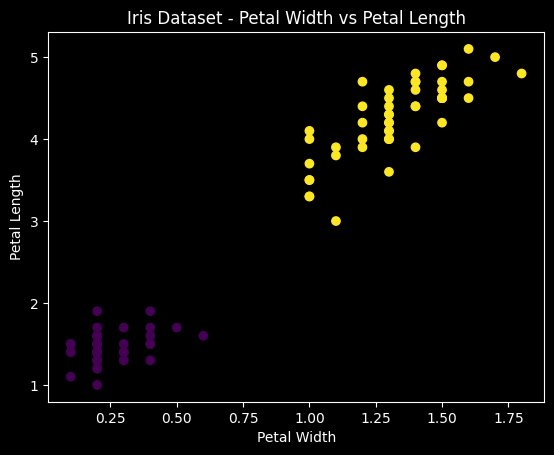

In [132]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Iris Dataset - Sepal Length vs Sepal Width')
plt.show()

plt.scatter(X[:, 0], X[:, 2], c=y)
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Iris Dataset - Sepal Length vs Petal Length')
plt.show()

plt.scatter(X[:, 0], X[:, 3], c=y)
plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')
plt.title('Iris Dataset - Sepal Length vs Petal Width')
plt.show()




plt.scatter(X[:, 1], X[:, 0], c=y)
plt.xlabel('Sepal Width')
plt.ylabel('Sepal Length')
plt.title('Iris Dataset - Sepal Width vs Sepal Length')
plt.show()

plt.scatter(X[:, 1], X[:, 2], c=y)
plt.xlabel('Sepal Width')
plt.ylabel('Petal Length')
plt.title('Iris Dataset - Sepal Width vs Petal Length')
plt.show()

plt.scatter(X[:, 1], X[:, 3], c=y)
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.title('Iris Dataset - Sepal Length vs Petal Width')
plt.show()




plt.scatter(X[:, 2], X[:, 0], c=y)
plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.title('Iris Dataset - Petal Length vs Sepal Length')
plt.show()

plt.scatter(X[:, 2], X[:, 1], c=y)
plt.xlabel('Petal Length')
plt.ylabel('Sepal Width')
plt.title('Iris Dataset - Petal Length vs Sepal Width')
plt.show()

plt.scatter(X[:, 2], X[:, 3], c=y)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Iris Dataset - Petal Length vs Petal Width')
plt.show()




plt.scatter(X[:, 3], X[:, 0], c=y)
plt.xlabel('Petal Width')
plt.ylabel('Sepal Length')
plt.title('Iris Dataset - Petal Length vs Sepal Length')
plt.show()

plt.scatter(X[:, 3], X[:, 1], c=y)
plt.xlabel('Petal Width')
plt.ylabel('Sepal Width')
plt.title('Iris Dataset - Petal Width vs Sepal Width')
plt.show()

plt.scatter(X[:, 3], X[:, 2], c=y)
plt.xlabel('Petal Width')
plt.ylabel('Petal Length')
plt.title('Iris Dataset - Petal Width vs Petal Length')
plt.show()

In [133]:
def probabilityDensityFunction(x, mu, sigma):
    n = x.shape[0]
    det_sigma = np.linalg.det(sigma)
    inv_sigma = np.linalg.inv(sigma)

    norm_const = 1 / ((2 * np.pi)**(n / 2) * np.sqrt(det_sigma))
    exponent = -0.5 * (x - mu).T @ inv_sigma @ (x - mu)

    return norm_const * np.exp(exponent)


In [134]:
def LogLikelihood(X, y, phi, mu0, mu1, sigma):
    eps = 1e-9
    phi = np.clip(phi, eps, 1 - eps)

    sigma_inv = np.linalg.inv(sigma)
    ll = 0.0

    for i in range(len(y)):
        if y[i] == 1:
            diff = X[i] - mu1
            ll += np.log(phi) - 0.5 * diff.T @ sigma_inv @ diff
        else:
            diff = X[i] - mu0
            ll += np.log(1 - phi) - 0.5 * diff.T @ sigma_inv @ diff

    return ll


In [135]:
phi = np.mean(y)

mu0 = np.mean(X[y == 0], axis=0)
mu1 = np.mean(X[y == 1], axis=0)

m, d = X.shape
sigma = np.zeros((d, d))

for i in range(m):
    diff = X[i] - (mu1 if y[i] == 1 else mu0)
    sigma += np.outer(diff, diff)

sigma /= m

print("Phi:", phi)
print("Mu0:", mu0)
print("Mu1:", mu1)
print("Sigma:", sigma)

Phi: 0.5
Mu0: [5.006 3.428 1.462 0.246]
Mu1: [5.936 2.77  4.26  1.326]
Sigma: [[0.191434 0.090356 0.097634 0.032394]
 [0.090356 0.118658 0.046232 0.024746]
 [0.097634 0.046232 0.122978 0.038794]
 [0.032394 0.024746 0.038794 0.024604]]


In [136]:
loglik=LogLikelihood(X, y, phi, mu0, mu1, sigma)
print("Log-Likelihood:", loglik)

Log-Likelihood: -269.31471805599455


In [137]:
def Predict(x, phi, mu0, mu1, sigma):
    sigma_inv = np.linalg.inv(sigma)

    score0 = np.log(1 - phi) - 0.5 * (x - mu0).T @ sigma_inv @ (x - mu0)
    score1 = np.log(phi)     - 0.5 * (x - mu1).T @ sigma_inv @ (x - mu1)

    return 1 if score1 > score0 else 0


In [138]:
pred = np.array([Predict(X[i], phi, mu0, mu1, sigma) for i in range(len(X))])
print("Accuracy:", np.mean(pred == y))


Accuracy: 1.0


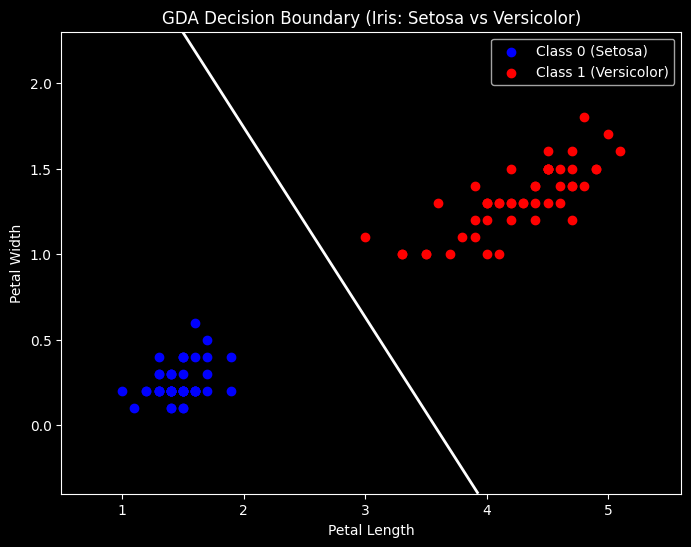

In [140]:
# Binary Iris already assumed: y in {0,1}
X2 = X[:, [2, 3]]   # petal length, petal width
phi = np.clip(np.mean(y), 1e-9, 1 - 1e-9)

mu0 = np.mean(X2[y == 0], axis=0)
mu1 = np.mean(X2[y == 1], axis=0)

m, d = X2.shape
sigma = np.zeros((d, d))

for i in range(m):
    diff = X2[i] - (mu1 if y[i] == 1 else mu0)
    sigma += np.outer(diff, diff)

sigma /= m
sigma_inv = np.linalg.inv(sigma)

def gda_decision(x):
    score0 = np.log(1 - phi) - 0.5 * (x - mu0).T @ sigma_inv @ (x - mu0)
    score1 = np.log(phi)     - 0.5 * (x - mu1).T @ sigma_inv @ (x - mu1)
    return score1 - score0

x_min, x_max = X2[:, 0].min() - 0.5, X2[:, 0].max() + 0.5
y_min, y_max = X2[:, 1].min() - 0.5, X2[:, 1].max() + 0.5

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

grid = np.c_[xx.ravel(), yy.ravel()]

Z = np.array([gda_decision(x) for x in grid])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))

# Decision boundary
plt.contour(xx, yy, Z, levels=[0], colors='white', linewidths=2)

# Data points
plt.scatter(X2[y == 0][:, 0], X2[y == 0][:, 1],
            color='blue', label='Class 0 (Setosa)')
plt.scatter(X2[y == 1][:, 0], X2[y == 1][:, 1],
            color='red', label='Class 1 (Versicolor)')

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('GDA Decision Boundary (Iris: Setosa vs Versicolor)')
plt.legend()
plt.show()
